In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import pandas as pd
import datetime as dt
from src.models.game_set import GameSetModel
pd.options.display.float_format = '{:.2f}'.format

In [2]:
os.environ['BETFAIR_USERNAME'] = 'Westermann'
os.environ['BETFAIR_PASSWORD'] = 'JavisM0m'
os.environ['BETFAIR_API_KEY'] = 'UPKD93WPOSKJWPq5'
os.environ['BETFAIR_API_CERTS_DIR'] = '/Users/jonaspaulwestermann/Dev/marchmadness/certs/'

In [3]:
gsm = GameSetModel()

Running Feature Pipeline
-- Seeds --
(2117, 9)
Feature Pipeline Clock: 0 Seconds
Fit Features Loaded: (2117, 3)
Running Feature Pipeline
-- Seeds --
(35, 9)
Feature Pipeline Clock: 0 Seconds
Pred Features Loaded: (35, 3)


In [4]:
gsm.get_prediction_table().dropna()

,eventName,sortPriority,runnerName,external_id,price_min,price_max,price_std,price_mean,pred,E(r)
0,Alabama @ Virginia Tech,1,Alabama,1104,1.98,2.46,0.27,2.22,0.53,1.30
1,Alabama @ Virginia Tech,2,Virginia Tech,1439,1.69,2.02,0.18,1.85,0.47,0.95
2,Arizona State @ Syracuse,1,Arizona State,1113,1.76,2.02,0.14,1.89,0.73,1.48
3,Arizona State @ Syracuse,2,Syracuse,1393,1.98,2.32,0.19,2.15,0.27,0.62
6,Buffalo @ Arizona,1,Buffalo,1138,1.02,6.40,2.90,3.70,0.27,1.70
7,Buffalo @ Arizona,2,Arizona,1112,1.19,55.00,26.51,15.27,0.73,40.36
8,Butler @ Arkansas,1,Butler,1139,2.08,2.12,0.03,2.10,0.62,1.32
9,Butler @ Arkansas,2,Arkansas,1116,1.90,1.93,0.02,1.92,0.38,0.73
12,Coll Charleston @ Auburn,1,Coll Charleston,1158,1.02,7.80,3.51,4.19,0.52,4.07
13,Coll Charleston @ Auburn,2,Auburn,1120,1.15,3.90,1.58,2.08,0.48,1.86


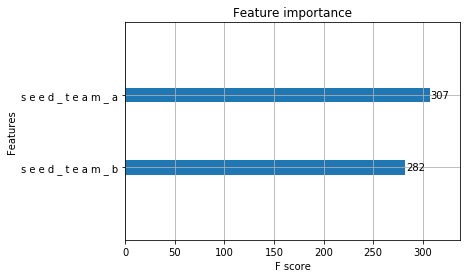

In [5]:
%matplotlib inline
from xgboost import plot_importance
plot_importance(gsm.model.estimator, max_num_features=10)

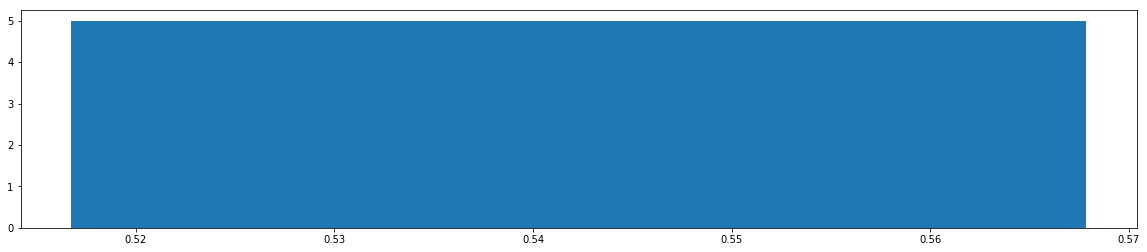

,log_loss,ncaa_log_loss
mean,0.55,0.55
std,0.02,0.02
min,0.52,0.52
max,0.57,0.57


In [6]:
gsm.model.cross_validate(n=1, n_splits=5, show_histogram=True)